In [3]:
"""     
Student Name:  ZHANG Xinyue                /        Qiao  Shuyu        /       Li Zhuoxuan
Student ID:    20750194                    /          20747563         /        20740917
Student Email: xzhangfa@connect.ust.hk     /   sqiaoac@connect.ust.hk  /   zlify@connect.ust.hk
Course Name:   MSBD5012
URL in github: https://github.com/orange-neng/MSBD5012-Forest-type-prediction-exploration
"""

'     \nStudent Name:  ZHANG Xinyue                /        Qiao  Shuyu        /       Li Zhuoxuan\nStudent ID:    20750194                    /          20747563         /        20740917\nStudent Email: xzhangfa@connect.ust.hk     /   sqiaoac@connect.ust.hk  /   zlify@connect.ust.hk\nCourse Name:   MSBD5012\nURL in github: https://github.com/orange-neng/MSBD5012-Forest-type-prediction-exploration\n'

In [5]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

# Read raw data from the file

import pandas #provides data structures to quickly analyze data
#Since this code runs on Kaggle server, train data can be accessed directly in the 'input' folder
dataset = pandas.read_csv("./SAMPLEtrain.csv") 

#Drop the first column 'Id' since it just has serial numbers. Not useful in the prediction process.
dataset = dataset.iloc[:,1:]

In [6]:
#Removal list initialize
rem = []

#Add constant columns as they don't help in prediction process
for c in dataset.columns:
    if dataset[c].std() == 0: #standard deviation is zero
        rem.append(c)

#drop the columns        
dataset.drop(rem,axis=1,inplace=True)

print(rem)



['Soil_Type7', 'Soil_Type15']


In [7]:
r, c = dataset.shape

#get the list of columns
cols = dataset.columns
#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)
#array of importance rank of all features  
ranks = []

#Extract only the values
array = dataset.values

#Y is the target column, X has the rest
X_orig = array[:,0:(c-1)]
Y = array[:,(c-1)]

#Validation chunk size
val_size = 0.1

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

#Split the data into chunks
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_orig, Y, test_size=val_size, random_state=seed)

#Import libraries for data transformations

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

#All features
X_all = []
#Additionally we will make a list of subsets
X_all_add =[]

#columns to be dropped
rem_cols = []
#indexes of columns to be dropped
i_rem = []

#Add this version of X to the list 
X_all.append(['Orig','All', X_train,X_val,1.0,cols[:c-1],rem_cols,ranks,i_cols,i_rem])

#point where categorical data begins
size=10

import numpy

#Standardized
#Apply transform only for non-categorical data
X_temp = StandardScaler().fit_transform(X_train[:,0:size])
X_val_temp = StandardScaler().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = numpy.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = numpy.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['StdSca','All', X_con,X_val_con,1.0,cols,rem_cols,ranks,i_cols,i_rem])

#MinMax
#Apply transform only for non-categorical data
X_temp = MinMaxScaler().fit_transform(X_train[:,0:size])
X_val_temp = MinMaxScaler().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = numpy.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = numpy.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['MinMax', 'All', X_con,X_val_con,1.0,cols,rem_cols,ranks,i_cols,i_rem])

#Normalize
#Apply transform only for non-categorical data
X_temp = Normalizer().fit_transform(X_train[:,0:size])
X_val_temp = Normalizer().fit_transform(X_val[:,0:size])
#Concatenate non-categorical data and categorical
X_con = numpy.concatenate((X_temp,X_train[:,size:]),axis=1)
X_val_con = numpy.concatenate((X_val_temp,X_val[:,size:]),axis=1)
#Add this version of X to the list 
X_all.append(['Norm', 'All', X_con,X_val_con,1.0,cols,rem_cols,ranks,i_cols,i_rem])

#Impute
#Imputer is not used as no data is missing

#List of transformations
trans_list = []

for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
    trans_list.append(trans)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:64268)
Traceback (most recent call last):
  File "/usr/local/Cellar/apache-spark/3.0.1/libexec/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 977, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/Cellar/apache-spark/3.0.1/libexec/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1115, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 61] Connection refused
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:64268)
Traceback (most recent call last):
  File "/usr/local/Cellar/apache-spark/3.0.1/libexec/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 977, in _get_connection
    connection = self.deque.pop()
IndexError:

In [8]:
ratio_list = [0.75,0.50,0.25]

#Median of rankings for each column
unsorted_rank = [0,8,11,4,5,2,5,7.5,9.5,3,8,28.5,14.5,2,35,19.5,12,14,37,25.5,50,44,9,28,20.5,19.5,40,38,20,38,43,35,44,22,24,33,49,42,46,47,27.5,19,31.5,23,28,42,30.5,46,40,12,13,18]

#List of feature selection models
feat = []

#Add Median to the list 
n = 'Median'
for val in ratio_list:
    feat.append([n,val])   

for trans,s, X, X_val, d, cols, rem_cols, ra, i_cols, i_rem in X_all:
    #Create subsets of feature list based on ranking and ratio_list
    for name, v in feat:
        #Combine importance and index of the column in the array joined
        joined = []
        for i, pred in enumerate(unsorted_rank):
            joined.append([i,cols[i],pred])
        #Sort in descending order    
        joined_sorted = sorted(joined, key=lambda x: x[2])
        #Starting point of the columns to be dropped
        rem_start = int((v*(c-1)))
        #List of names of columns selected
        cols_list = []
        #Indexes of columns selected
        i_cols_list = []
        #Ranking of all the columns
        rank_list =[]
        #List of columns not selected
        rem_list = []
        #Indexes of columns not selected
        i_rem_list = []
        #Split the array. Store selected columns in cols_list and removed in rem_list
        for j, (i, col, x) in enumerate(list(joined_sorted)):
            #Store the rank
            rank_list.append([i,j])
            #Store selected columns in cols_list and indexes in i_cols_list
            if(j < rem_start):
                cols_list.append(col)
                i_cols_list.append(i)
            #Store not selected columns in rem_list and indexes in i_rem_list    
            else:
                rem_list.append(col)
                i_rem_list.append(i)    
        #Sort the rank_list and store only the ranks. Drop the index 
        #Append model name, array, columns selected and columns to be removed to the additional list        
        X_all_add.append([trans,name,X,X_val,v,cols_list,rem_list,[x[1] for x in sorted(rank_list,key=lambda x:x[0])],i_cols_list,i_rem_list])

In [9]:
#Import plotting library    
import matplotlib.pyplot as plt    

#Dictionary to store the accuracies for all combinations 
acc = {}

#List of combinations
comb = []

#Append name of transformation to trans_list
for trans in trans_list:
    acc[trans]=[]

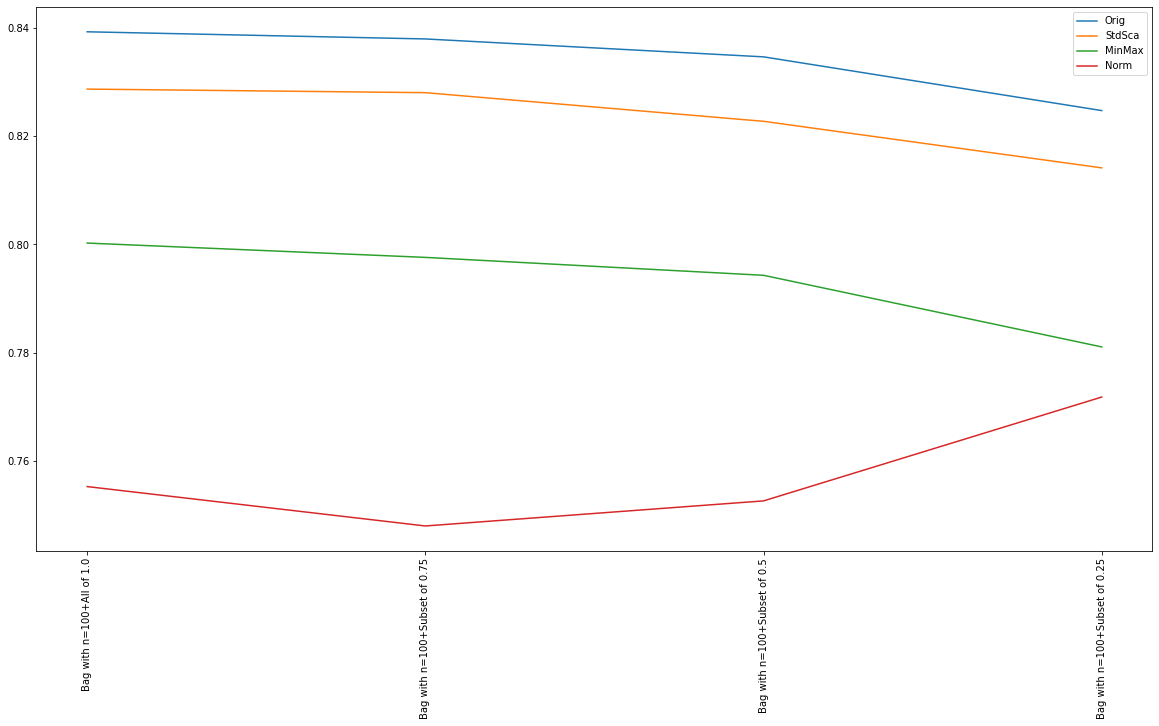

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Base estimator
base_estimator = DecisionTreeClassifier(random_state=seed,max_depth=13)

n_list = [100]

for n_estimators in n_list:
    #Set the base model
    model = BaggingClassifier(n_jobs=-1,base_estimator=base_estimator, n_estimators=n_estimators, random_state=seed)
   
    algo = "Bag"

    #Set figure size
    plt.rc("figure", figsize=(20, 10))

    #Accuracy of the model using all features
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"All",1.0))

    #Accuracy of the model using a subset of features    
    for trans,name,X,X_val,v,cols_list,rem_list,rank_list,i_cols_list,i_rem_list in X_all_add:
        model.fit(X[:,i_cols_list],Y_train)
        result = model.score(X_val[:,i_cols_list], Y_val)
        acc[trans].append(result)
        #print(trans+"+"+name+"+%d" % (v*(c-1)))
        #print(result)
    for v in ratio_list:
        comb.append("%s with n=%s+%s of %s" % (algo,n_estimators,"Subset",v))
    
#Plot the accuracies of all combinations
fig, ax = plt.subplots()
#Plot each transformation
for trans in trans_list:
       plt.plot(acc[trans])
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Display the plot
plt.legend(trans_list,loc='best')    
#Plot the accuracy for all combinations
plt.show()    

#Best estimated performance is close to 82% when n_estimators is 100 for Original